In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import librosa

In [3]:
N_FFT = 512
N_MELS = 64
HOP_LEN = 256
SAMPLE_RATE = 16000
DURATION = 1.5
f = open('./data/norm/время/1.pkl', 'rb')
spec = pickle.load(f)


### Входные данные

Размерность: (64, 94)
Сами данные (нормализованные от 0 до 1):
 [[0.         0.         0.         ... 0.3844862  0.4877576  0.42516097]
 [0.         0.         0.         ... 0.38992754 0.4704523  0.3994711 ]
 [0.         0.         0.         ... 0.36835593 0.3178485  0.36579752]
 ...
 [0.         0.         0.         ... 0.         0.         0.30531168]
 [0.         0.         0.         ... 0.         0.         0.26559582]
 [0.         0.         0.         ... 0.         0.         0.25961027]]


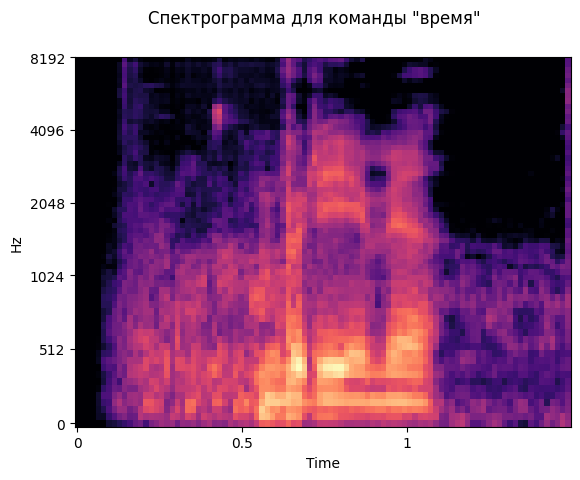

In [33]:
print('Размерность:', spec.shape)
print('Сами данные (нормализованные от 0 до 1):\n', spec)
fig, ax = plt.subplots()
fig.suptitle('Спектрограмма для команды "время"')
librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel')

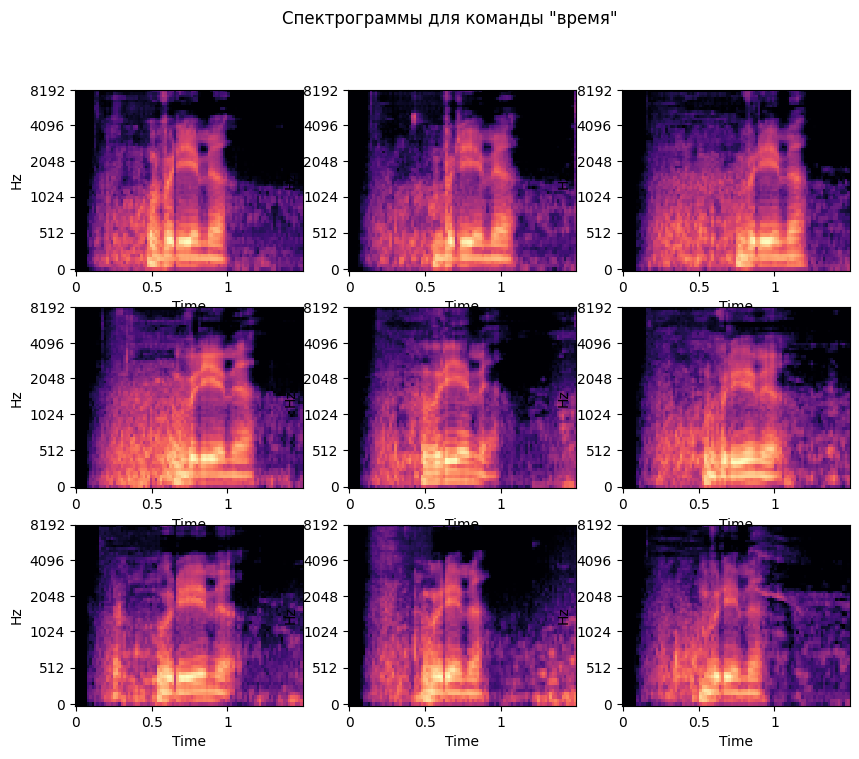

In [18]:
fig, ax = plt.subplots(3, 3, figsize = (10, 8))
fig.suptitle('Спектрограммы для команды "время"')
k = 0
for i in range(3):
    for j in range(3):
        f = open(f'./data/norm/время/{k}.pkl', 'rb')
        spec = pickle.load(f)
        f.close()
        librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[i, j])
        k+=1 

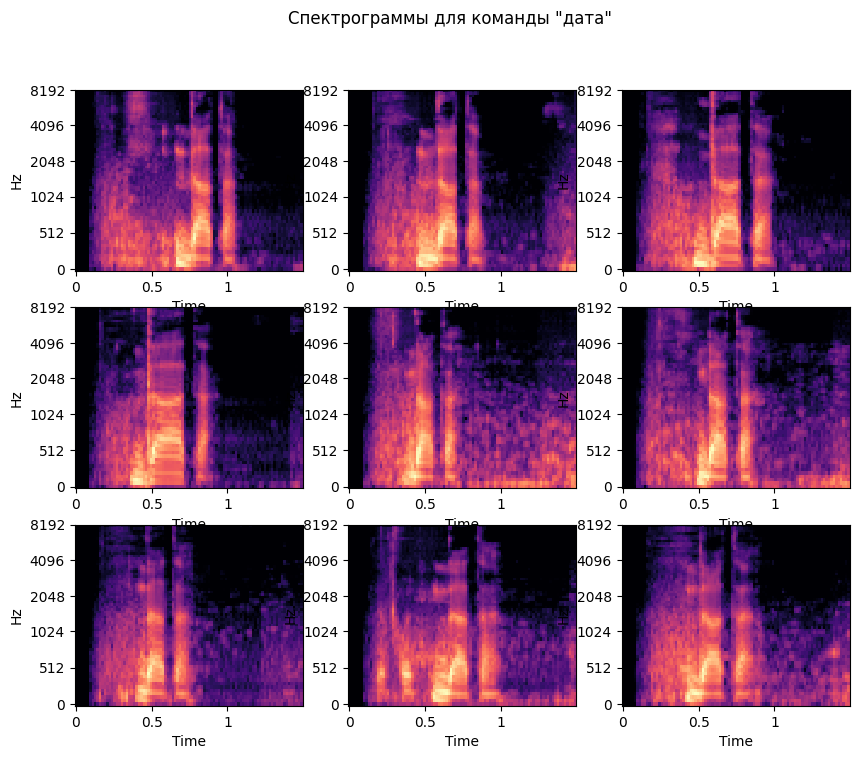

In [50]:
fig, ax = plt.subplots(3, 3, figsize = (10, 8))
fig.suptitle('Спектрограммы для команды "дата"')
k = 0
for i in range(3):
    for j in range(3):
        f = open(f'./data/norm/дата/{k}.pkl', 'rb')
        spec = pickle.load(f)
        f.close()
        librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[i, j])
        k+=1 

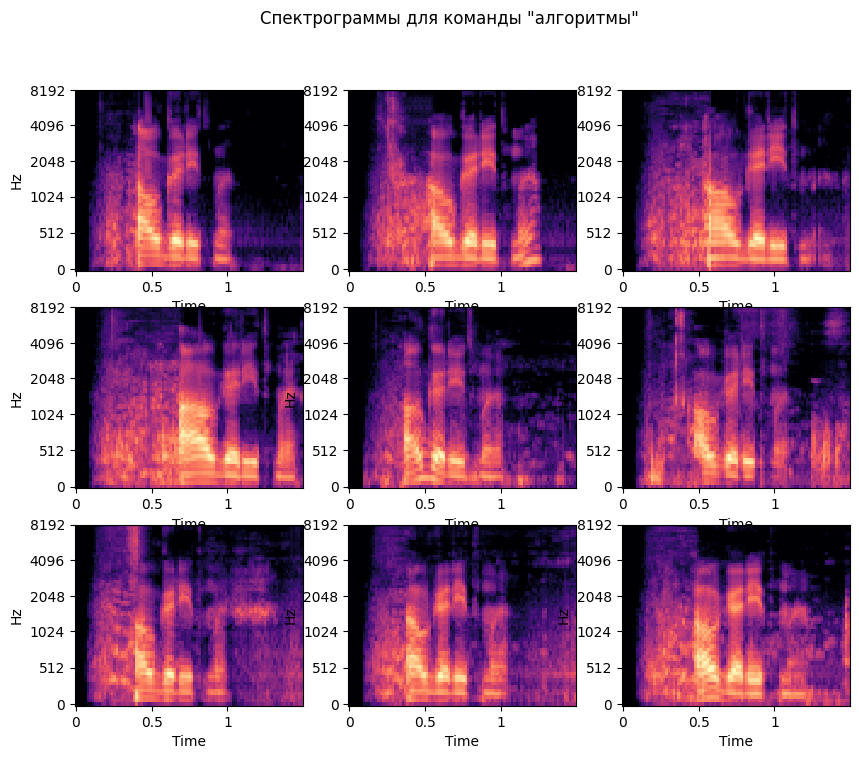

In [10]:
fig, ax = plt.subplots(3, 3, figsize = (10, 8))
fig.suptitle('Спектрограммы для команды "алгоритмы"')
k = 10
for i in range(3):
    for j in range(3):
        f = open(f'./data/norm/алгоритмы/{k}.pkl', 'rb')
        spec = pickle.load(f)
        f.close()
        librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[i, j])
        k+=1 

## Спектрограммы с МК

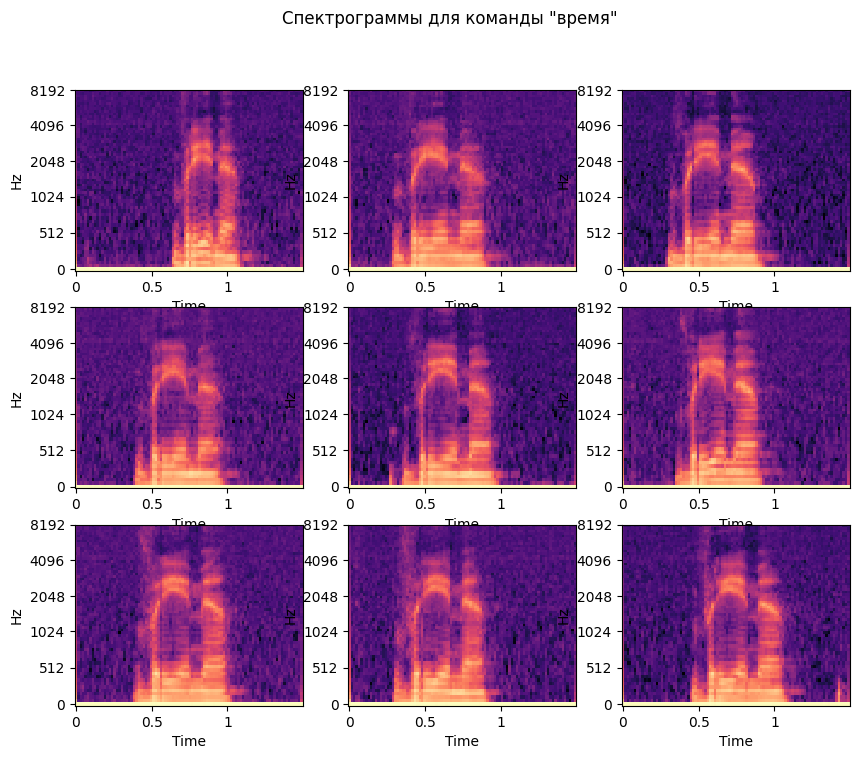

In [12]:
fig, ax = plt.subplots(3, 3, figsize = (10, 8))
fig.suptitle('Спектрограммы для команды "время"')
k = 0 
for i in range(3):
    for j in range(3):
        f = open(f'./data/norm/время/mk{k}.pkl', 'rb')
        spec = pickle.load(f)
        f.close()
        librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[i, j])
        k+=1 

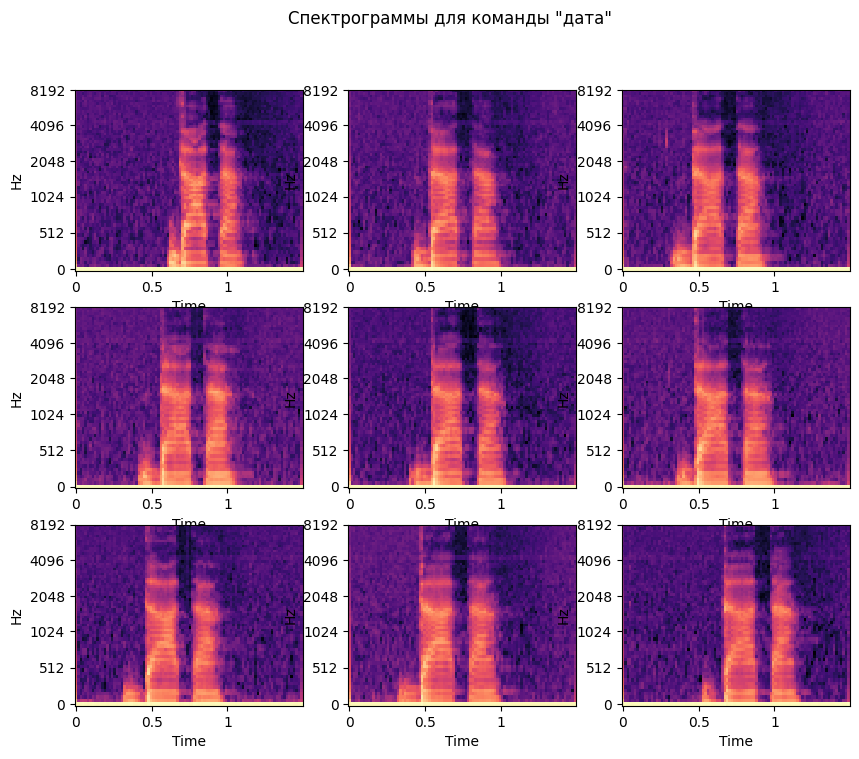

In [13]:
fig, ax = plt.subplots(3, 3, figsize = (10, 8))
fig.suptitle('Спектрограммы для команды "дата"')
k = 0
for i in range(3):
    for j in range(3):
        f = open(f'./data/norm/дата/mk{k}.pkl', 'rb')
        spec = pickle.load(f)
        f.close()
        librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[i, j])
        k+=1 

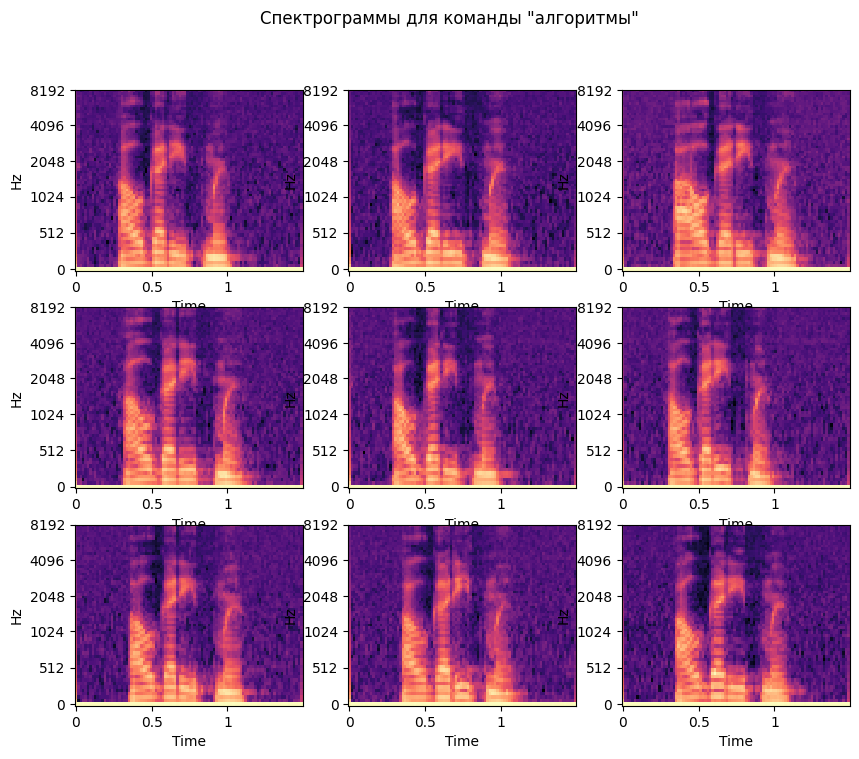

In [14]:
fig, ax = plt.subplots(3, 3, figsize = (10, 8))
fig.suptitle('Спектрограммы для команды "алгоритмы"')
k = 10
for i in range(3):
    for j in range(3):
        f = open(f'./data/norm/алгоритмы/mk{k}.pkl', 'rb')
        spec = pickle.load(f)
        f.close()
        librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[i, j])
        k+=1 

## Аугментация данных


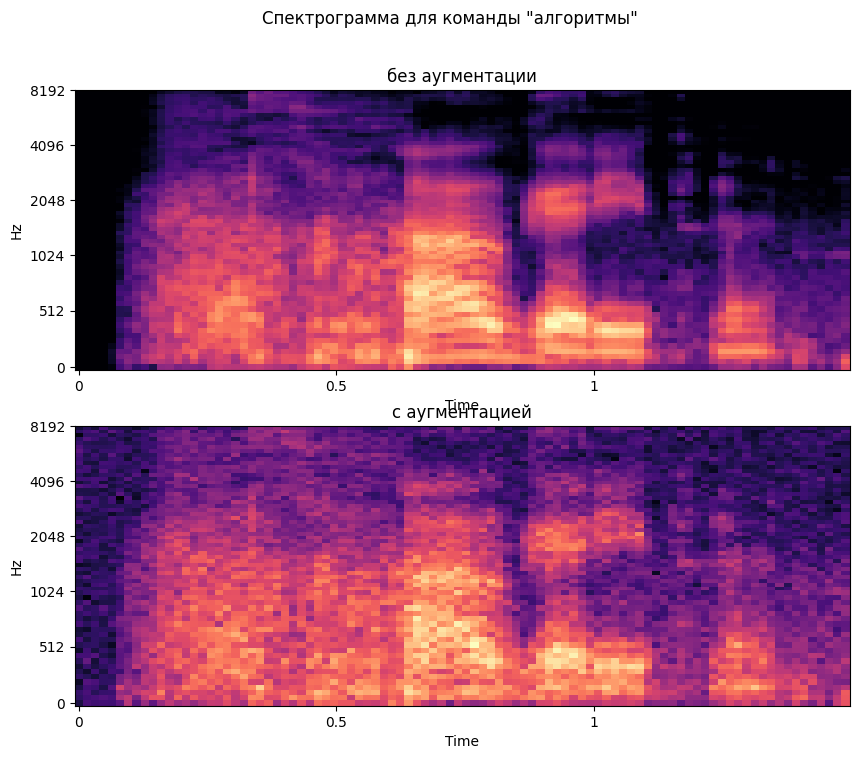

In [46]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
fig.suptitle('Спектрограмма для команды "алгоритмы"')
k = 0 
f = open(f'./data/norm/алгоритмы/21.pkl', 'rb')
spec = pickle.load(f)
f.close()
f = open(f'./data/norm/алгоритмы/21A.pkl', 'rb')
spec_a = pickle.load(f)
f.close()
ax[0].set_title('без аугментации')
ax[1].set_title('с аугментацией')
librosa.display.specshow(spec, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[0])
librosa.display.specshow(spec_a, sr = SAMPLE_RATE, hop_length = HOP_LEN, x_axis='time', y_axis = 'mel', ax = ax[1])
k+=1 

## Структура нейросети

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
class ResNetSpectrogram(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.resnet = resnet18(pretrained=False)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=1, padding=1, bias=False)
        self.resnet.avgpool = nn.Identity()
        self.resnet.fc = nn.Identity()
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
    
    def forward(self, x):
        
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        #print(x.shape)
        
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        #print(x.shape)
        
        x = self.adaptive_pool(x)
        #print(x.shape)
        
        x = torch.flatten(x, 1)
        #print(x.shape)

        x = self.fc(x)
        #print(x.shape)
        return x

In [6]:
print('Структура нейросети для классификации спектрограмм')
print()
print(ResNetSpectrogram(4))

Структура нейросети для классификации спектрограмм

ResNetSpectrogram(
  (resnet): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Ba

C:\Users\KIRIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\KIRIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
